<img src="images/upGrad.png" alt="upGrad" align="Right" style="width: 200px;"/>
<img src="images/IIITB.jpeg" alt="IITB" align="Left" style="width: 200px;"/>

# Telecom Churn Prediction

<b>Author:</b> Karthik Premanand, Anish Mahapatra

<i>Telecom Churn Casestudy </i>

## Problem Statement

## Data Understanding and Exploration

In [146]:
# Importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [147]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [148]:
# Reading the dataset
telecom = pd.read_csv("Datasets/telecom_churn_data.csv")

In [149]:
# Sense Check of the Data
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [150]:
# Viewing the shape of the data
telecom.shape

(99999, 226)

In [151]:
# Summary of the dataset
print(telecom.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [152]:
# Printing all the columns with atleast one null value
telecom.columns[telecom.isna().any()].tolist()

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',

There are 99999 rows, 226 columns, in the dataset out of which 166 columns have null values

### Exploratory Data Analysis

#### Missing Value Analysis

In [153]:
df = telecom.copy(deep=True)

In [154]:
# Visulalizing the percentage of missing values
missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

Feature  missing (%)
mobile_number                        mobile_number     0.000000
circle_id                                circle_id     0.000000
loc_og_t2o_mou                      loc_og_t2o_mou     1.018010
std_og_t2o_mou                      std_og_t2o_mou     1.018010
loc_ic_t2o_mou                      loc_ic_t2o_mou     1.018010
last_date_of_month_6          last_date_of_month_6     0.000000
last_date_of_month_7          last_date_of_month_7     0.601006
last_date_of_month_8          last_date_of_month_8     1.100011
last_date_of_month_9          last_date_of_month_9     1.659017
arpu_6                                      arpu_6     0.000000
arpu_7                                      arpu_7     0.000000
arpu_8                                      arpu_8     0.000000
arpu_9                                      arpu_9     0.000000
onnet_mou_6                            onnet_mou_6     3.937039
onnet_mou_7                            onnet_mou_7     3.859039
onnet_mou_8                            onnet_mou_8     5.378054
onnet_mou_9                            onnet_mou_9     7.745077
offnet_mou_6                          offnet_mou_6     3.937039
offnet_mou_7                          offnet_mou_7     3.859039
offnet_mou_8                          offnet_mou_8     5.378054
offnet_mou_9                          offnet_mou_9     7.745077
roam_ic_mou_6                        roam_ic_mou_6     3.937039
roam_ic_mou_7                        roam_ic_mou_7     3.859039
roam_ic_mou_8                        roam_ic_mou_8     5.378054
roam_ic_mou_9                        roam_ic_mou_9     7.745077
roam_og_mou_6                        roam_og_mou_6     3.937039
roam_og_mou_7                        roam_og_mou_7     3.859039
roam_og_mou_8                        roam_og_mou_8     5.378054
roam_og_mou_9                        roam_og_mou_9     7.745077
loc_og_t2t_mou_6                  loc_og_t2t_mou_6     3.937039
loc_og_t2t_mou_7                  loc_og_t2t_mou_7     3.859039
loc_og_t2t_mou_8                  loc_og_t2t_mou_8     5.378054
loc_og_t2t_mou_9                  loc_og_t2t_mou_9     7.745077
loc_og_t2m_mou_6                  loc_og_t2m_mou_6     3.937039
loc_og_t2m_mou_7                  loc_og_t2m_mou_7     3.859039
loc_og_t2m_mou_8                  loc_og_t2m_mou_8     5.378054
loc_og_t2m_mou_9                  loc_og_t2m_mou_9     7.745077
loc_og_t2f_mou_6                  loc_og_t2f_mou_6     3.937039
loc_og_t2f_mou_7                  loc_og_t2f_mou_7     3.859039
loc_og_t2f_mou_8                  loc_og_t2f_mou_8     5.378054
loc_og_t2f_mou_9                  loc_og_t2f_mou_9     7.745077
loc_og_t2c_mou_6                  loc_og_t2c_mou_6     3.937039
loc_og_t2c_mou_7                  loc_og_t2c_mou_7     3.859039
loc_og_t2c_mou_8                  loc_og_t2c_mou_8     5.378054
loc_og_t2c_mou_9                  loc_og_t2c_mou_9     7.745077
loc_og_mou_6                          loc_og_mou_6     3.937039
loc_og_mou_7                          loc_og_mou_7     3.859039
loc_og_mou_8                          loc_og_mou_8     5.378054
loc_og_mou_9                          loc_og_mou_9     7.745077
std_og_t2t_mou_6                  std_og_t2t_mou_6     3.937039
std_og_t2t_mou_7                  std_og_t2t_mou_7     3.859039
std_og_t2t_mou_8                  std_og_t2t_mou_8     5.378054
std_og_t2t_mou_9                  std_og_t2t_mou_9     7.745077
std_og_t2m_mou_6                  std_og_t2m_mou_6     3.937039
std_og_t2m_mou_7                  std_og_t2m_mou_7     3.859039
std_og_t2m_mou_8                  std_og_t2m_mou_8     5.378054
std_og_t2m_mou_9                  std_og_t2m_mou_9     7.745077
std_og_t2f_mou_6                  std_og_t2f_mou_6     3.937039
std_og_t2f_mou_7                  std_og_t2f_mou_7     3.859039
std_og_t2f_mou_8                  std_og_t2f_mou_8     5.378054
std_og_t2f_mou_9                  std_og_t2f_mou_9     7.745077
std_og_t2c_mou_6                  std_og_t2c_mou_6     3.937039
std_og_t2c_

In [155]:
print(telecom['arpu_3g_6'].describe())

count    25153.000000
mean        89.555057
std        193.124653
min        -30.820000
25%          0.000000
50%          0.480000
75%        122.070000
max       6362.280000
Name: arpu_3g_6, dtype: float64


We realize that a lot of the columns have 'NA' values. There are two kinds of missing values here:

* Actual missing - 
    * date_of_last_rech_data_6
    * date_of_last_rech_data_7
    * date_of_last_rech_data_8
    * date_of_last_rech_data_9
    * total_rech_data_6	
    * total_rech_data_7	
    * total_rech_data_8	
    * total_rech_data_9
    * max_rech_data_6
    * max_rech_data_7
    * max_rech_data_8
    * max_rech_data_9
    * av_rech_amt_data_6
    * av_rech_amt_data_7
    * av_rech_amt_data_8
    * av_rech_amt_data_9
    
    
    
* Imputing the values with zero    
    * arpu_3g_6
    * arpu_3g_7
    * arpu_3g_8
    * arpu_3g_9
    * arpu_2g_6
    * arpu_2g_7
    * arpu_2g_8
    * arpu_2g_9
    
    
* Meaningful NA values - 
    * fb_user_6
    * fb_user_7
    * fb_user_8
    * fb_user_9
    * night_pck_user_6
    * night_pck_user_7
    * night_pck_user_8
    * night_pck_user_9
    * count_rech_2g_6
    * count_rech_2g_7
    * count_rech_2g_8
    * count_rech_2g_9
    * count_rech_3g_6
    * count_rech_3g_7
    * count_rech_3g_8
    * count_rech_3g_9
    

    


In [156]:
# Handling indicative missing values
df['arpu_3g_6'].fillna(0, inplace = True) 
df['arpu_3g_7'].fillna(0, inplace = True) 
df['arpu_3g_8'].fillna(0, inplace = True)
df['arpu_3g_9'].fillna(0, inplace = True) 
df['arpu_2g_6'].fillna(0, inplace = True) 
df['arpu_2g_7'].fillna(0, inplace = True)
df['arpu_2g_8'].fillna(0, inplace = True) 
df['arpu_2g_9'].fillna(0, inplace = True)
df['fb_user_6'].fillna(0, inplace = True) 
df['fb_user_7'].fillna(0, inplace = True) 
df['fb_user_8'].fillna(0, inplace = True)
df['fb_user_9'].fillna(0, inplace = True) 
df['night_pck_user_6'].fillna(0, inplace = True) 
df['night_pck_user_7'].fillna(0, inplace = True)
df['night_pck_user_8'].fillna(0, inplace = True) 
df['night_pck_user_9'].fillna(0, inplace = True)
df['count_rech_2g_6'].fillna(0, inplace = True) 
df['count_rech_2g_7'].fillna(0, inplace = True) 
df['count_rech_2g_8'].fillna(0, inplace = True)
df['count_rech_2g_9'].fillna(0, inplace = True) 
df['count_rech_3g_6'].fillna(0, inplace = True) 
df['count_rech_3g_7'].fillna(0, inplace = True)
df['count_rech_3g_8'].fillna(0, inplace = True) 
df['count_rech_3g_9'].fillna(0, inplace = True)

In [157]:
# Dropping columns with more than 70% Actual missing values

df = df.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'], axis=1)

In [158]:
# Visulalizing the percentage of missing values after handling the NA values
missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

Feature  missing (%)
mobile_number                mobile_number     0.000000
circle_id                        circle_id     0.000000
loc_og_t2o_mou              loc_og_t2o_mou     1.018010
std_og_t2o_mou              std_og_t2o_mou     1.018010
loc_ic_t2o_mou              loc_ic_t2o_mou     1.018010
last_date_of_month_6  last_date_of_month_6     0.000000
last_date_of_month_7  last_date_of_month_7     0.601006
last_date_of_month_8  last_date_of_month_8     1.100011
last_date_of_month_9  last_date_of_month_9     1.659017
arpu_6                              arpu_6     0.000000
arpu_7                              arpu_7     0.000000
arpu_8                              arpu_8     0.000000
arpu_9                              arpu_9     0.000000
onnet_mou_6                    onnet_mou_6     3.937039
onnet_mou_7                    onnet_mou_7     3.859039
onnet_mou_8                    onnet_mou_8     5.378054
onnet_mou_9                    onnet_mou_9     7.745077
offnet_mou_6                  offnet_mou_6     3.937039
offnet_mou_7                  offnet_mou_7     3.859039
offnet_mou_8                  offnet_mou_8     5.378054
offnet_mou_9                  offnet_mou_9     7.745077
roam_ic_mou_6                roam_ic_mou_6     3.937039
roam_ic_mou_7                roam_ic_mou_7     3.859039
roam_ic_mou_8                roam_ic_mou_8     5.378054
roam_ic_mou_9                roam_ic_mou_9     7.745077
roam_og_mou_6                roam_og_mou_6     3.937039
roam_og_mou_7                roam_og_mou_7     3.859039
roam_og_mou_8                roam_og_mou_8     5.378054
roam_og_mou_9                roam_og_mou_9     7.745077
loc_og_t2t_mou_6          loc_og_t2t_mou_6     3.937039
loc_og_t2t_mou_7          loc_og_t2t_mou_7     3.859039
loc_og_t2t_mou_8          loc_og_t2t_mou_8     5.378054
loc_og_t2t_mou_9          loc_og_t2t_mou_9     7.745077
loc_og_t2m_mou_6          loc_og_t2m_mou_6     3.937039
loc_og_t2m_mou_7          loc_og_t2m_mou_7     3.859039
loc_og_t2m_mou_8          loc_og_t2m_mou_8     5.378054
loc_og_t2m_mou_9          loc_og_t2m_mou_9     7.745077
loc_og_t2f_mou_6          loc_og_t2f_mou_6     3.937039
loc_og_t2f_mou_7          loc_og_t2f_mou_7     3.859039
loc_og_t2f_mou_8          loc_og_t2f_mou_8     5.378054
loc_og_t2f_mou_9          loc_og_t2f_mou_9     7.745077
loc_og_t2c_mou_6          loc_og_t2c_mou_6     3.937039
loc_og_t2c_mou_7          loc_og_t2c_mou_7     3.859039
loc_og_t2c_mou_8          loc_og_t2c_mou_8     5.378054
loc_og_t2c_mou_9          loc_og_t2c_mou_9     7.745077
loc_og_mou_6                  loc_og_mou_6     3.937039
loc_og_mou_7                  loc_og_mou_7     3.859039
loc_og_mou_8                  loc_og_mou_8     5.378054
loc_og_mou_9                  loc_og_mou_9     7.745077
std_og_t2t_mou_6          std_og_t2t_mou_6     3.937039
std_og_t2t_mou_7          std_og_t2t_mou_7     3.859039
std_og_t2t_mou_8          std_og_t2t_mou_8     5.378054
std_og_t2t_mou_9          std_og_t2t_mou_9     7.745077
std_og_t2m_mou_6          std_og_t2m_mou_6     3.937039
std_og_t2m_mou_7          std_og_t2m_mou_7     3.859039
std_og_t2m_mou_8          std_og_t2m_mou_8     5.378054
std_og_t2m_mou_9          std_og_t2m_mou_9     7.745077
std_og_t2f_mou_6          std_og_t2f_mou_6     3.937039
std_og_t2f_mou_7          std_og_t2f_mou_7     3.859039
std_og_t2f_mou_8          std_og_t2f_mou_8     5.378054
std_og_t2f_mou_9          std_og_t2f_mou_9     7.745077
std_og_t2c_mou_6          std_og_t2c_mou_6     3.937039
std_og_t2c_mou_7          std_og_t2c_mou_7     3.859039
std_og_t2c_mou_8          std_og_t2c_mou_8     5.378054
std_og_t2c_mou_9          std_og_t2c_mou_9     7.745077
std_og_mou_6                  std_og_mou_6     3.937039
std_og_mou_7                  std_og_mou_7     3.859039
std_og_mou_8                  std_og_mou_8     5.378054
std_og_mou_9                  std_og_mou_9     7.745077
isd_og_mou_6                  isd_og_mou_6     3.937039
isd_og_mou_7                  isd_og_mou_7     3.859039
isd

No more columns will be removed as all the remaining missing values are in the acceptable range

#### Calculating derived metrics before dropping date objects

In [159]:
### Calculating the number of days since last recharge for a particular month
df['last_date_of_month_6'] = pd.to_datetime(df['last_date_of_month_6'])
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['day_of_last_rech_6'] = (df['last_date_of_month_6'] - df['date_of_last_rech_6']) / np.timedelta64(1, 'D')
df['week_of_last_rech_6'] = df['day_of_last_rech_6'] % 7


df['last_date_of_month_7'] = pd.to_datetime(df['last_date_of_month_7'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['day_of_last_rech_7'] = (df['last_date_of_month_7'] - df['date_of_last_rech_7']) / np.timedelta64(1, 'D')
df['week_of_last_rech_7'] = df['day_of_last_rech_7'] % 7

df['last_date_of_month_8'] = pd.to_datetime(df['last_date_of_month_8'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])
df['day_of_last_rech_8'] = (df['last_date_of_month_8'] - df['date_of_last_rech_8']) / np.timedelta64(1, 'D')
df['week_of_last_rech_8'] = df['day_of_last_rech_8'] % 7

df['last_date_of_month_9'] = pd.to_datetime(df['last_date_of_month_9'])
df['date_of_last_rech_9'] = pd.to_datetime(df['date_of_last_rech_9'])
df['day_of_last_rech_9'] = (df['last_date_of_month_9'] - df['date_of_last_rech_9']) / np.timedelta64(1, 'D')
df['week_of_last_rech_9'] = df['day_of_last_rech_9'] % 7

In [160]:
### Dropping the date objects

df = df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'], axis=1)


In [161]:
### Dropping the mobile number

df = df.drop(['mobile_number'],axis= 1)

In [162]:
# Visulalizing the percentage of missing values after handling the date objects
missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

Feature  missing (%)
circle_id                      circle_id     0.000000
loc_og_t2o_mou            loc_og_t2o_mou     1.018010
std_og_t2o_mou            std_og_t2o_mou     1.018010
loc_ic_t2o_mou            loc_ic_t2o_mou     1.018010
arpu_6                            arpu_6     0.000000
arpu_7                            arpu_7     0.000000
arpu_8                            arpu_8     0.000000
arpu_9                            arpu_9     0.000000
onnet_mou_6                  onnet_mou_6     3.937039
onnet_mou_7                  onnet_mou_7     3.859039
onnet_mou_8                  onnet_mou_8     5.378054
onnet_mou_9                  onnet_mou_9     7.745077
offnet_mou_6                offnet_mou_6     3.937039
offnet_mou_7                offnet_mou_7     3.859039
offnet_mou_8                offnet_mou_8     5.378054
offnet_mou_9                offnet_mou_9     7.745077
roam_ic_mou_6              roam_ic_mou_6     3.937039
roam_ic_mou_7              roam_ic_mou_7     3.859039
roam_ic_mou_8              roam_ic_mou_8     5.378054
roam_ic_mou_9              roam_ic_mou_9     7.745077
roam_og_mou_6              roam_og_mou_6     3.937039
roam_og_mou_7              roam_og_mou_7     3.859039
roam_og_mou_8              roam_og_mou_8     5.378054
roam_og_mou_9              roam_og_mou_9     7.745077
loc_og_t2t_mou_6        loc_og_t2t_mou_6     3.937039
loc_og_t2t_mou_7        loc_og_t2t_mou_7     3.859039
loc_og_t2t_mou_8        loc_og_t2t_mou_8     5.378054
loc_og_t2t_mou_9        loc_og_t2t_mou_9     7.745077
loc_og_t2m_mou_6        loc_og_t2m_mou_6     3.937039
loc_og_t2m_mou_7        loc_og_t2m_mou_7     3.859039
loc_og_t2m_mou_8        loc_og_t2m_mou_8     5.378054
loc_og_t2m_mou_9        loc_og_t2m_mou_9     7.745077
loc_og_t2f_mou_6        loc_og_t2f_mou_6     3.937039
loc_og_t2f_mou_7        loc_og_t2f_mou_7     3.859039
loc_og_t2f_mou_8        loc_og_t2f_mou_8     5.378054
loc_og_t2f_mou_9        loc_og_t2f_mou_9     7.745077
loc_og_t2c_mou_6        loc_og_t2c_mou_6     3.937039
loc_og_t2c_mou_7        loc_og_t2c_mou_7     3.859039
loc_og_t2c_mou_8        loc_og_t2c_mou_8     5.378054
loc_og_t2c_mou_9        loc_og_t2c_mou_9     7.745077
loc_og_mou_6                loc_og_mou_6     3.937039
loc_og_mou_7                loc_og_mou_7     3.859039
loc_og_mou_8                loc_og_mou_8     5.378054
loc_og_mou_9                loc_og_mou_9     7.745077
std_og_t2t_mou_6        std_og_t2t_mou_6     3.937039
std_og_t2t_mou_7        std_og_t2t_mou_7     3.859039
std_og_t2t_mou_8        std_og_t2t_mou_8     5.378054
std_og_t2t_mou_9        std_og_t2t_mou_9     7.745077
std_og_t2m_mou_6        std_og_t2m_mou_6     3.937039
std_og_t2m_mou_7        std_og_t2m_mou_7     3.859039
std_og_t2m_mou_8        std_og_t2m_mou_8     5.378054
std_og_t2m_mou_9        std_og_t2m_mou_9     7.745077
std_og_t2f_mou_6        std_og_t2f_mou_6     3.937039
std_og_t2f_mou_7        std_og_t2f_mou_7     3.859039
std_og_t2f_mou_8        std_og_t2f_mou_8     5.378054
std_og_t2f_mou_9        std_og_t2f_mou_9     7.745077
std_og_t2c_mou_6        std_og_t2c_mou_6     3.937039
std_og_t2c_mou_7        std_og_t2c_mou_7     3.859039
std_og_t2c_mou_8        std_og_t2c_mou_8     5.378054
std_og_t2c_mou_9        std_og_t2c_mou_9     7.745077
std_og_mou_6                std_og_mou_6     3.937039
std_og_mou_7                std_og_mou_7     3.859039
std_og_mou_8                std_og_mou_8     5.378054
std_og_mou_9                std_og_mou_9     7.745077
isd_og_mou_6                isd_og_mou_6     3.937039
isd_og_mou_7                isd_og_mou_7     3.859039
isd_og_mou_8                isd_og_mou_8     5.378054
isd_og_mou_9                isd_og_mou_9     7.745077
spl_og_mou_6                spl_og_mou_6     3.937039
spl_og_mou_7                spl_og_mou_7     3.859039
spl_og_mou_8                spl_og_mou_8     5.378054
spl_og_mou_9                spl_og_mou_9     7.745077
og_others_6                  og_others_6     3.937039
og_others_7                  og_other

#### Iterative imputation for missing values between 0-8 %

Using sklearn's iterative imputer to calculate missing values for columns in range 1-8%.
<br>**Note:** The initialization strategy depends on the respective column. The estimator used is Bayesian Ridge.
The columns and initialization method are as follows:
- MOU : mean
- OTHERS, DAY_OF_LAST_RECH, WEEK_OF_LAST_RECH : median

In [163]:
# Using sklearn's iterative imputer to calculate missing values for columns in range 1-8%.
## Note: The initialization strategy depends on the respective column. The estimator used is Bayesian Ridge.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=4, initial_strategy='mean')
imp_mean.fit(df)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=4, random_state=None,
                 sample_posterior=False, tol=0.001, verbose=0)

In [164]:
df = pd.DataFrame(data=imp_mean.transform(df),
                  columns = list(df.columns.values),
                             dtype='int')

In [165]:
# Visulalizing the percentage of missing values after handling the date objects
missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

Feature  missing (%)
circle_id                      circle_id          0.0
loc_og_t2o_mou            loc_og_t2o_mou          0.0
std_og_t2o_mou            std_og_t2o_mou          0.0
loc_ic_t2o_mou            loc_ic_t2o_mou          0.0
arpu_6                            arpu_6          0.0
arpu_7                            arpu_7          0.0
arpu_8                            arpu_8          0.0
arpu_9                            arpu_9          0.0
onnet_mou_6                  onnet_mou_6          0.0
onnet_mou_7                  onnet_mou_7          0.0
onnet_mou_8                  onnet_mou_8          0.0
onnet_mou_9                  onnet_mou_9          0.0
offnet_mou_6                offnet_mou_6          0.0
offnet_mou_7                offnet_mou_7          0.0
offnet_mou_8                offnet_mou_8          0.0
offnet_mou_9                offnet_mou_9          0.0
roam_ic_mou_6              roam_ic_mou_6          0.0
roam_ic_mou_7              roam_ic_mou_7          0.0
roam_ic_mou_8              roam_ic_mou_8          0.0
roam_ic_mou_9              roam_ic_mou_9          0.0
roam_og_mou_6              roam_og_mou_6          0.0
roam_og_mou_7              roam_og_mou_7          0.0
roam_og_mou_8              roam_og_mou_8          0.0
roam_og_mou_9              roam_og_mou_9          0.0
loc_og_t2t_mou_6        loc_og_t2t_mou_6          0.0
loc_og_t2t_mou_7        loc_og_t2t_mou_7          0.0
loc_og_t2t_mou_8        loc_og_t2t_mou_8          0.0
loc_og_t2t_mou_9        loc_og_t2t_mou_9          0.0
loc_og_t2m_mou_6        loc_og_t2m_mou_6          0.0
loc_og_t2m_mou_7        loc_og_t2m_mou_7          0.0
loc_og_t2m_mou_8        loc_og_t2m_mou_8          0.0
loc_og_t2m_mou_9        loc_og_t2m_mou_9          0.0
loc_og_t2f_mou_6        loc_og_t2f_mou_6          0.0
loc_og_t2f_mou_7        loc_og_t2f_mou_7          0.0
loc_og_t2f_mou_8        loc_og_t2f_mou_8          0.0
loc_og_t2f_mou_9        loc_og_t2f_mou_9          0.0
loc_og_t2c_mou_6        loc_og_t2c_mou_6          0.0
loc_og_t2c_mou_7        loc_og_t2c_mou_7          0.0
loc_og_t2c_mou_8        loc_og_t2c_mou_8          0.0
loc_og_t2c_mou_9        loc_og_t2c_mou_9          0.0
loc_og_mou_6                loc_og_mou_6          0.0
loc_og_mou_7                loc_og_mou_7          0.0
loc_og_mou_8                loc_og_mou_8          0.0
loc_og_mou_9                loc_og_mou_9          0.0
std_og_t2t_mou_6        std_og_t2t_mou_6          0.0
std_og_t2t_mou_7        std_og_t2t_mou_7          0.0
std_og_t2t_mou_8        std_og_t2t_mou_8          0.0
std_og_t2t_mou_9        std_og_t2t_mou_9          0.0
std_og_t2m_mou_6        std_og_t2m_mou_6          0.0
std_og_t2m_mou_7        std_og_t2m_mou_7          0.0
std_og_t2m_mou_8        std_og_t2m_mou_8          0.0
std_og_t2m_mou_9        std_og_t2m_mou_9          0.0
std_og_t2f_mou_6        std_og_t2f_mou_6          0.0
std_og_t2f_mou_7        std_og_t2f_mou_7          0.0
std_og_t2f_mou_8        std_og_t2f_mou_8          0.0
std_og_t2f_mou_9        std_og_t2f_mou_9          0.0
std_og_t2c_mou_6        std_og_t2c_mou_6          0.0
std_og_t2c_mou_7        std_og_t2c_mou_7          0.0
std_og_t2c_mou_8        std_og_t2c_mou_8          0.0
std_og_t2c_mou_9        std_og_t2c_mou_9          0.0
std_og_mou_6                std_og_mou_6          0.0
std_og_mou_7                std_og_mou_7          0.0
std_og_mou_8                std_og_mou_8          0.0
std_og_mou_9                std_og_mou_9          0.0
isd_og_mou_6                isd_og_mou_6          0.0
isd_og_mou_7                isd_og_mou_7          0.0
isd_og_mou_8                isd_og_mou_8          0.0
isd_og_mou_9                isd_og_mou_9          0.0
spl_og_mou_6                spl_og_mou_6          0.0
spl_og_mou_7                spl_og_mou_7          0.0
spl_og_mou_8                spl_og_mou_8          0.0
spl_og_mou_9                spl_og_mou_9          0.0
og_others_6                  og_others_6          0.0
og_others_7                  og_other

No more missing values, no categorical data to handle

### Filter high value customers

80-20 rule - 80% revenue generated by 20% customers


months 6,7 - good phase

Filteration is based on usage and not revenue generated with equal weightage given to both calling minutes and data usage (calling in terms of mins, data usage in terms of MB)
 
total_calling_usage_6 = total_og_mou_6 + total_ic_mou_6
<br>
total_data_usage_6 = vol_2g_mb_6 + vol_3g_mb_6
<br>
total_calling_usage_7 = total_og_mou_7 + total_ic_mou_7
<br>
total_data_usage_7 = vol_2g_mb_7 + vol_3g_mb_7

<br>
Total usage for months 6 and 7:
<br>
total_usage_6 = total_calling_usage_6 + total_data_usage_6
<br>
total_usage_7 = total_calling_usage_7 + total_data_usage_7

Average usage for months 6 and 7:
<br>
avg_usage_6_7 = (total_usage_6 + total_usage_7)/2

In [166]:
## Generating avg usage for customers for the 'good' months 6 & 7

df['total_calling_usage_6'] = df['total_og_mou_6'] + df['total_ic_mou_6']
df['total_data_usage_6'] = df['vol_2g_mb_6'] + df['vol_3g_mb_6']

df['total_calling_usage_7'] = df['total_og_mou_7'] + df['total_ic_mou_7']
df['total_data_usage_7'] = df['vol_2g_mb_7'] + df['vol_3g_mb_7']

df['total_usage_6'] = df['total_calling_usage_6'] + df['total_data_usage_6']
df['total_usage_7'] = df['total_calling_usage_7'] + df['total_data_usage_7']

df['avg_usage_6_7'] = (df['total_usage_6'] + df['total_usage_7']) / 2


In [167]:
df['avg_usage_6_7'].quantile(0.7)

762.0

In [168]:
df['hvc_flag'] = [1 if x >= df['avg_usage_6_7'].quantile(0.7) else 0 for x in df['avg_usage_6_7']]

In [169]:
### Removing low valued customers

df = df[df.hvc_flag != 0]

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30021 entries, 6 to 99997
Columns: 217 entries, circle_id to hvc_flag
dtypes: float64(1), int32(215), int64(1)
memory usage: 25.3 MB


### Deriving target churn variable

Calculate churn variable based on month 9

if (total_calling_usage_9 + total_data_usage_9) = 0:
churn = 1
else churn = 0


In [171]:
df['total_calling_usage_9'] = df['total_og_mou_9'] + df['total_ic_mou_9']
df['total_data_usage_9'] = df['vol_2g_mb_9'] + df['vol_3g_mb_9']

df['total_usage_9'] = df['total_calling_usage_9'] + df['total_data_usage_9']

In [172]:
## Creating target variable

df['churn_flag'] = [1 if x == 0 else 0 for x in df['total_usage_9']]

In [173]:
## Checking the count of churned customers

df['churn_flag'].value_counts(ascending=True)

1     2284
0    27737
Name: churn_flag, dtype: int64

### Removing all columns corresponding to month 9

Explanation - variables not important anymore as predictor variables are needed to calculate churn for the target month 9

In [174]:
## Dropping columns pertaining to month 9 
df = df.drop([col for col in df.columns if '9' in col], axis=1)

In [175]:
## Checking if the remaining variables have missing values

missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

Feature  missing (%)
circle_id                          circle_id          0.0
loc_og_t2o_mou                loc_og_t2o_mou          0.0
std_og_t2o_mou                std_og_t2o_mou          0.0
loc_ic_t2o_mou                loc_ic_t2o_mou          0.0
arpu_6                                arpu_6          0.0
arpu_7                                arpu_7          0.0
arpu_8                                arpu_8          0.0
onnet_mou_6                      onnet_mou_6          0.0
onnet_mou_7                      onnet_mou_7          0.0
onnet_mou_8                      onnet_mou_8          0.0
offnet_mou_6                    offnet_mou_6          0.0
offnet_mou_7                    offnet_mou_7          0.0
offnet_mou_8                    offnet_mou_8          0.0
roam_ic_mou_6                  roam_ic_mou_6          0.0
roam_ic_mou_7                  roam_ic_mou_7          0.0
roam_ic_mou_8                  roam_ic_mou_8          0.0
roam_og_mou_6                  roam_og_mou_6          0.0
roam_og_mou_7                  roam_og_mou_7          0.0
roam_og_mou_8                  roam_og_mou_8          0.0
loc_og_t2t_mou_6            loc_og_t2t_mou_6          0.0
loc_og_t2t_mou_7            loc_og_t2t_mou_7          0.0
loc_og_t2t_mou_8            loc_og_t2t_mou_8          0.0
loc_og_t2m_mou_6            loc_og_t2m_mou_6          0.0
loc_og_t2m_mou_7            loc_og_t2m_mou_7          0.0
loc_og_t2m_mou_8            loc_og_t2m_mou_8          0.0
loc_og_t2f_mou_6            loc_og_t2f_mou_6          0.0
loc_og_t2f_mou_7            loc_og_t2f_mou_7          0.0
loc_og_t2f_mou_8            loc_og_t2f_mou_8          0.0
loc_og_t2c_mou_6            loc_og_t2c_mou_6          0.0
loc_og_t2c_mou_7            loc_og_t2c_mou_7          0.0
loc_og_t2c_mou_8            loc_og_t2c_mou_8          0.0
loc_og_mou_6                    loc_og_mou_6          0.0
loc_og_mou_7                    loc_og_mou_7          0.0
loc_og_mou_8                    loc_og_mou_8          0.0
std_og_t2t_mou_6            std_og_t2t_mou_6          0.0
std_og_t2t_mou_7            std_og_t2t_mou_7          0.0
std_og_t2t_mou_8            std_og_t2t_mou_8          0.0
std_og_t2m_mou_6            std_og_t2m_mou_6          0.0
std_og_t2m_mou_7            std_og_t2m_mou_7          0.0
std_og_t2m_mou_8            std_og_t2m_mou_8          0.0
std_og_t2f_mou_6            std_og_t2f_mou_6          0.0
std_og_t2f_mou_7            std_og_t2f_mou_7          0.0
std_og_t2f_mou_8            std_og_t2f_mou_8          0.0
std_og_t2c_mou_6            std_og_t2c_mou_6          0.0
std_og_t2c_mou_7            std_og_t2c_mou_7          0.0
std_og_t2c_mou_8            std_og_t2c_mou_8          0.0
std_og_mou_6                    std_og_mou_6          0.0
std_og_mou_7                    std_og_mou_7          0.0
std_og_mou_8                    std_og_mou_8          0.0
isd_og_mou_6                    isd_og_mou_6          0.0
isd_og_mou_7                    isd_og_mou_7          0.0
isd_og_mou_8                    isd_og_mou_8          0.0
spl_og_mou_6                    spl_og_mou_6          0.0
spl_og_mou_7                    spl_og_mou_7          0.0
spl_og_mou_8                    spl_og_mou_8          0.0
og_others_6                      og_others_6          0.0
og_others_7                      og_others_7          0.0
og_others_8                      og_others_8          0.0
total_og_mou_6                total_og_mou_6          0.0
total_og_mou_7                total_og_mou_7          0.0
total_og_mou_8                total_og_mou_8          0.0
loc_ic_t2t_mou_6            loc_ic_t2t_mou_6          0.0
loc_ic_t2t_mou_7            loc_ic_t2t_mou_7          0.0
loc_ic_t2t_mou_8            loc_ic_t2t_mou_8          0.0
loc_ic_t2m_mou_6            loc_ic_t2m_mou_6          0.0
loc_ic_t2m_mou_7            loc_ic_t2m_mou_7          0.0
loc_ic_t2m_mou_8            loc_ic_t2m_mou_8          0.0
loc_ic_t2f_mou_6            loc_ic_t2f_mou_6          0.0
loc_ic_t2f_mou_7            loc_ic_

### Handling Outliers for predictor columns

In [141]:
# Remove the outliers

def removeOutliers (dat, columnName):
    q1 = dat[columnName].quantile(0.01)
    q4 = dat[columnName].quantile(0.99)
    dat = dat[(dat[columnName]>=q1) & (dat[columnName]<=q4)]
    return dat

In [142]:
# viewing the columns of the data
df.describe()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count    30021.0         30021.0         30021.0         30021.0   
mean       109.0             0.0             0.0             0.0   
std          0.0             0.0             0.0             0.0   
min        109.0             0.0             0.0             0.0   
25%        109.0             0.0             0.0             0.0   
50%        109.0             0.0             0.0             0.0   
75%        109.0             0.0             0.0             0.0   
max        109.0             0.0             0.0             0.0   

             arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30021.000000  30021.000000  30021.000000  30021.000000  30021.000000   
mean     533.955065    533.854002    486.199327    281.637454    286.934379   
std      446.346800    469.749247    482.100951    472.150012    490.805930   
min    -2258.000000  -2014.000000   -945.000000     -5.000000   -141.000000   
25%      285.000000    280.000000    218.000000     25.000000     23.000000   
50%      451.000000    448.000000    400.000000    100.000000     98.000000   
75%      675.000000    675.000000    637.000000    326.000000    327.000000   
max    27731.000000  35145.000000  33543.000000   7376.000000   8157.000000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30021.000000  30021.000000  30021.000000  30021.000000   30021.000000   
mean     248.879218    388.951467    391.674095    348.387129      11.411745   
std      466.082194    481.121233    496.582621    476.608201      60.844155   
min      -26.000000      0.000000     -6.000000    -64.000000     -20.000000   
25%       17.000000     88.000000     86.000000     66.000000       0.000000   
50%       78.000000    241.000000    236.000000    203.000000       0.000000   
75%      263.000000    506.000000    508.000000    455.000000       0.000000   
max    10752.000000   8362.000000   9667.000000  14007.000000    2589.000000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30021.000000   30021.000000   30021.000000   30021.000000   
mean        8.207122      10.267413      16.652110      12.256454   
std        54.912766      62.027993      85.381857      67.533301   
min        -5.000000      -6.000000       0.000000     -56.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2877.000000    2480.000000    3775.000000    1878.000000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30021.000000      30021.000000      30021.000000      30021.000000   
mean       15.545651         98.519769         98.416542         90.511775   
std        84.368524        254.045842        263.002772        248.211107   
min       -31.000000       -172.000000       -331.000000          0.000000   
25%         0.000000          6.000000          6.000000          5.000000   
50%         0.000000         29.000000         29.000000         26.000000   
75%         0.000000         92.000000         91.000000         84.000000   
max      3493.000000       6431.000000       7400.000000      10752.000000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30021.000000      30021.000000      30021.000000      30021.000000   
mean         174.701442        172.447753        161.537124          6.199294   
std          251.122506        242.664800        234.802804         21.668404   
min            0.000000          0.000000          0.000000          0.000000   
25%           26.000000         26.000000         20.000000          0.000000   
50%           90.000000         89.000000         79.000000          0.000000   
75%          230.000000        226.000000        212.000000          

In [143]:
# Removing the 99 percentile and and 1 percentile
columnNames = list(df.columns.values)

flag_col_names = ['churn_flag','hvc_flag','fb_user_8','fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']

targetColumnNames = list(set(columnNames) - set(flag_col_names))

# for stringName in targetColumnNames:
#     df = removeOutliers(df, stringName)

df = df = removeOutliers(df, '')

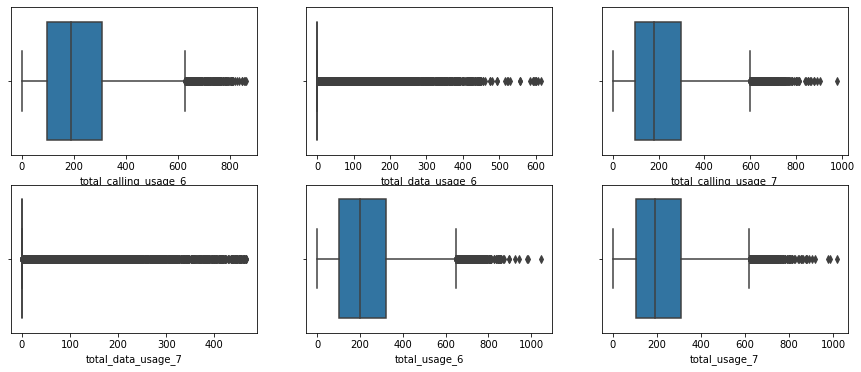

In [114]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'total_calling_usage_6', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'total_data_usage_6', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'total_calling_usage_7', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'total_data_usage_7', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'total_usage_6', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'total_usage_7', data = df)
plt.show()

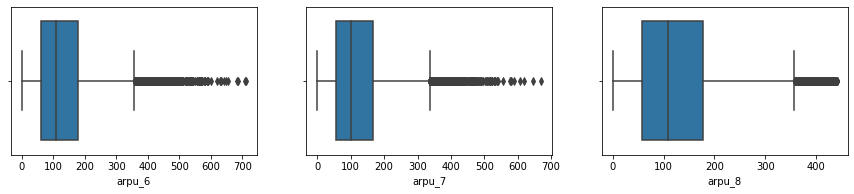

In [115]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'arpu_6', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'arpu_7', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'arpu_8', data = df)

In [144]:
 df

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  arpu_6  \
8            109               0               0               0     378   
21           109               0               0               0     514   
44           109               0               0               0     226   
59           109               0               0               0     221   
92           109               0               0               0     465   
134          109               0               0               0     740   
136          109               0               0               0     171   
137          109               0               0               0     244   
175          109               0               0               0     424   
185          109               0               0               0     340   
225          109               0               0               0     715   
240          109               0               0               0     351   
244          109               0               0               0     526   
245          109               0               0               0     289   
253          109               0               0               0     598   
274          109               0               0               0     367   
281          109               0               0               0     522   
293          109               0               0               0     170   
294          109               0               0               0     453   
317          109               0               0               0     313   
319          109               0               0               0     746   
321          109               0               0               0     761   
332          109               0               0               0     273   
338          109               0               0               0     113   
360          109               0               0               0     402   
389          109               0               0               0     406   
405          109               0               0               0     187   
427          109               0               0               0     346   
436          109               0               0               0     326   
445          109               0               0               0     435   
488          109               0               0               0     324   
512          109               0               0               0     294   
533          109               0               0               0     226   
535          109               0               0               0     194   
541          109               0               0               0     223   
545          109               0               0               0     503   
556          109               0               0               0     330   
558          109               0               0               0     669   
563          109               0               0               0     536   
586          109               0               0               0     258   
608          109               0               0               0     474   
612          109               0               0               0     252   
644          109               0               0               0     193   
655          109               0               0               0     329   
706          109               0               0               0     556   
718          109               0               0               0     441   
743          109               0               0               0     473   
745          109               0               0               0     392   
746          109               0               0               0     252   
763          109               0               0               0     894   
814          109               0               0               0     747   
818          109               0               0       

### Analysis of Target Variable

In [106]:
#LOL

df['churn_flag'].value_counts(ascending=True)

1    10612
0    89387
Name: churn_flag, dtype: int64

### Bivariate Analysis

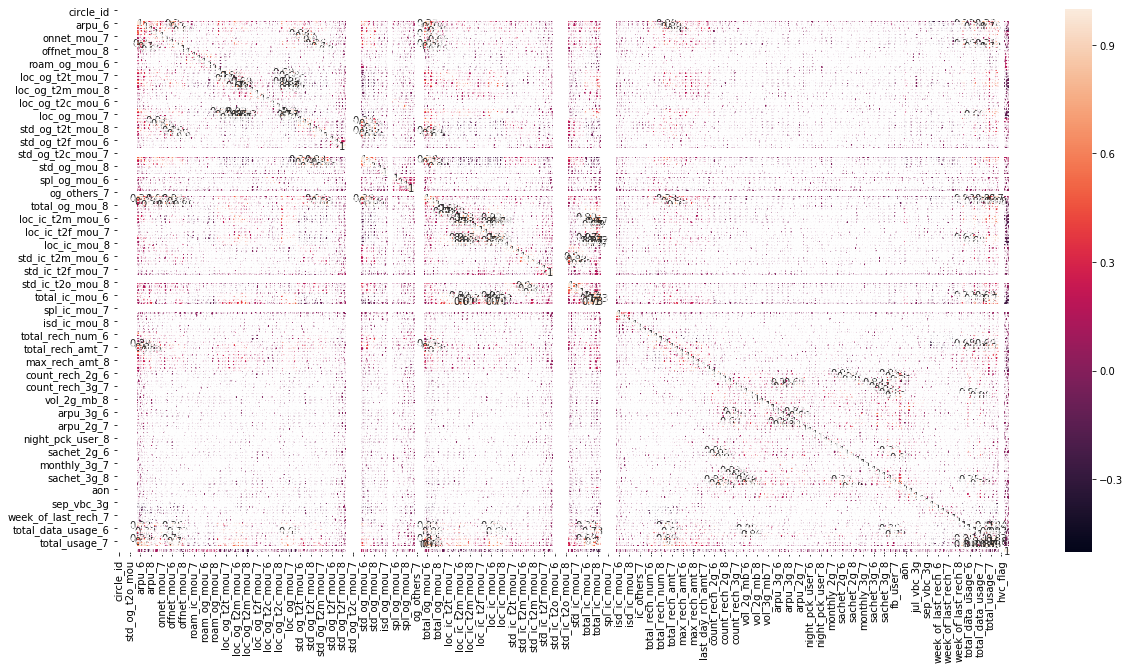

In [113]:
## Plot heatmap

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)